In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [7]:
def conduccion_1d(K, S, L, TA, TB, N):
    """
    PARAMETERS 
    ----------
    L : float
    L es la longitud del dominio 
    
    k: float
    es la conductividad del material 
    
    S: float
    es la fuente 
    
    TA: float
    Es la condición de frontera a la izquierda 
    
    TB : float 
    Es la condición de flontera a la derecha 
    
    N : int 
    Es la número de nodos internos (grados de libertad)
    
    return 
    --------
    al final esta función dibuja la solución 
    
    """
#    L = 5.0 
#    K = 0.02
#    S = 1.0
#    TA = 200
#    TB = 1000

 #   N = 4
    h = L / (N+1)



    T = np.zeros (N+2)
    b = np.zeros (N)
    A = np.zeros ((N,N))

    r = K / h**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA 
    b[-1] += TB

    for i in range (1,N-1):
        A[i,i]= 2
        A[i,i+1]= -1
        A[i,i-1]= -1
    A[0,0] = 2
    A[0,1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2

    T[1:N+1] = np.linalg.solve (A,b) 

    plt.plot(T, 'o-') 
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    

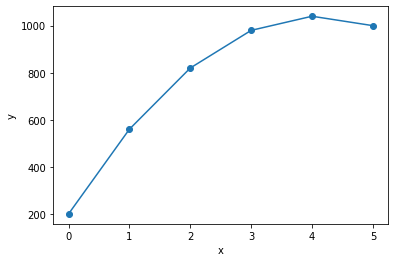

In [8]:
conduccion_1d(0.01, 1.0, 5.0, 200, 1000, 4)

In [9]:
w = widgets.interactive (conduccion_1d,
                        K = widgets.fixed(0.02), 
                        S = widgets.FloatSlider (max=1.0, min=0.0 , value=0, step=0.2),
                        L = widgets.fixed(5.0), 
                        TA = widgets.fixed(200), 
                        TB = widgets.fixed(1000), 
                        N = widgets.IntSlider(max=10, min=4, value=4) )

In [10]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…